In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The code below tarnsforms the categorical values into numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Exploratory Data Analysis

In [ ]:
print('The shape of the data is: ' + str(df.shape))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [17]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


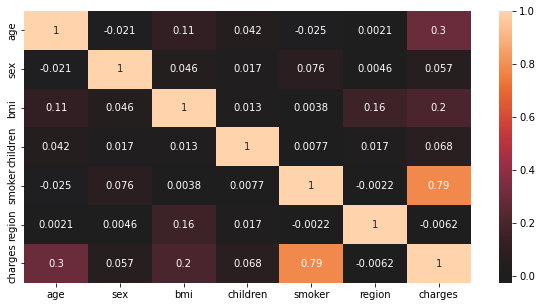

In [18]:
corr_data = df.corr()
fig = plt.figure(figsize = [10,5])
sns.heatmap(corr_data,annot = True, center = 0)
plt.show()

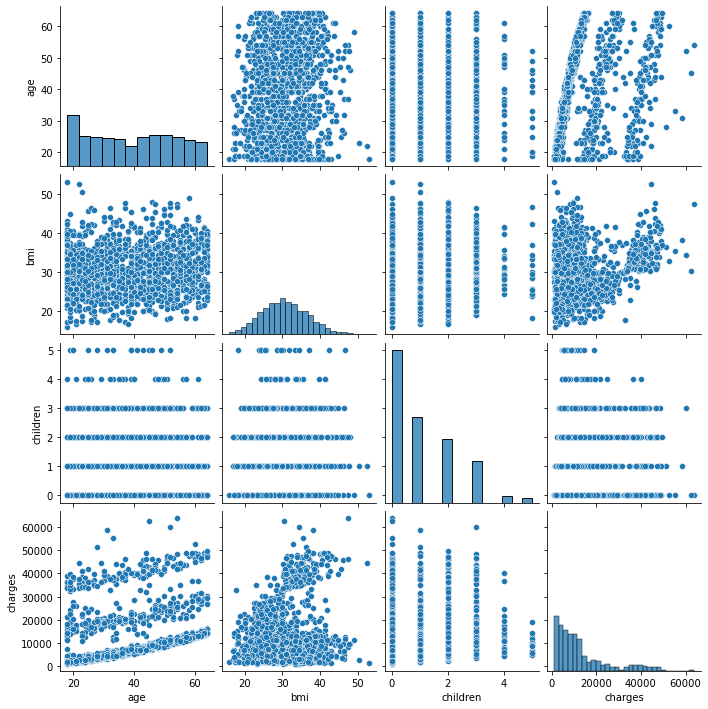

In [22]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'])
plt.show()

Text(0.5, 1.0, 'Age Distribution')

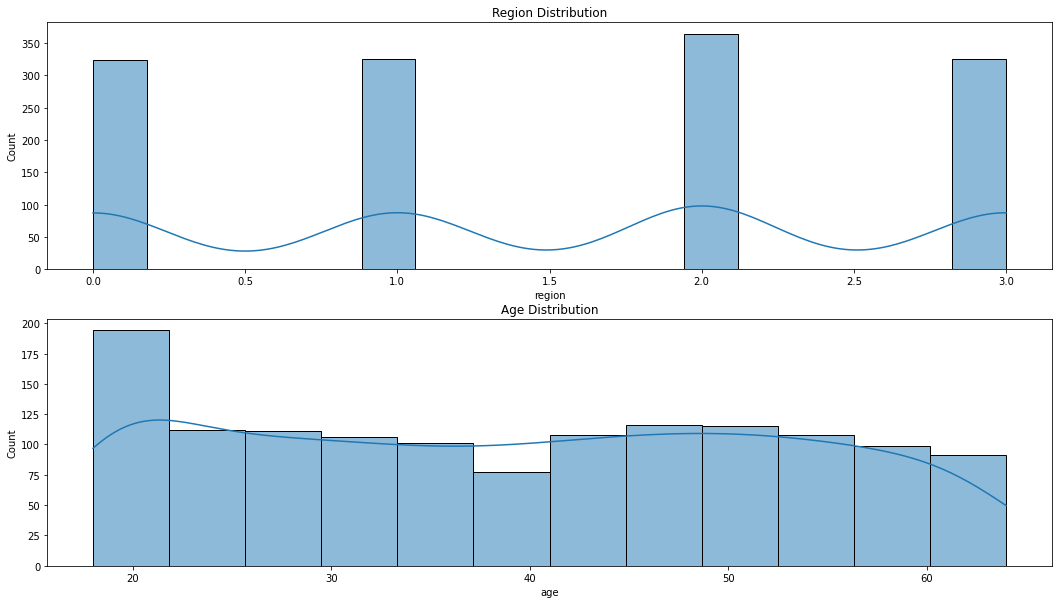

In [66]:
fig, axes = plt.subplots(2,1, figsize=(18, 10))
sns.histplot(df['region'], kde=True, ax=axes[0]) 
axes[0].set_title('Region Distribution')
sns.histplot(df['age'], kde=True, ax=axes[1]) 
axes[1].set_title('Age Distribution')

Text(0.5, 1.0, 'Sex vs Charges')

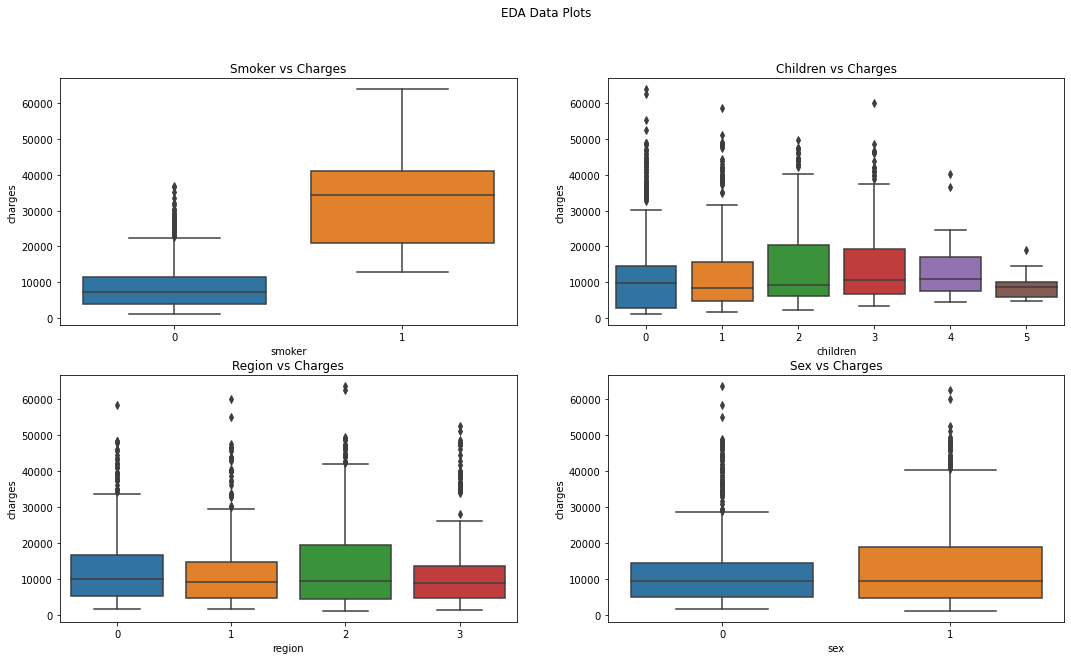

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('EDA Data Plots')

sns.boxplot(ax=axes[0, 0], data=df, x='smoker', y='charges')
axes[0,0].set_title('Smoker vs Charges')
sns.boxplot(ax=axes[0, 1], data=df, x='children', y='charges')
axes[0,1].set_title('Children vs Charges')
sns.boxplot(ax=axes[1, 0], data=df, x='region', y='charges')
axes[1,0].set_title('Region vs Charges')
sns.boxplot(ax=axes[1, 1], data=df, x='sex', y='charges')
axes[1,1].set_title('Sex vs Charges')

In [ ]:
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges')